### Consuming Kafka Streaming Data
We will be looking into more details about <strong>Apache Spark + Kafka Integration</strong> in Week 10. You can refer to the <a href="https://spark.apache.org/docs/latest/structured-streaming-kafka-integration.html" target='_blank'> official documentation</a> to know more details on Structured Streaming in Apache Spark.

#### Step 1: Import Necessary libraries and create spark session



In [1]:
import os
os.environ['PYSPARK_SUBMIT_ARGS'] = '--packages org.apache.spark:spark-streaming-kafka-0-10_2.12:3.0.0,org.apache.spark:spark-sql-kafka-0-10_2.12:3.0.0 pyspark-shell'

from pyspark.sql import SparkSession
from pyspark.sql.functions import explode
from pyspark.sql.functions import split
from pyspark.sql import functions as F
from pyspark.sql.types import *

spark = SparkSession \
    .builder \
    .appName("Clickstream Analysis in Spark") \
    .getOrCreate()


#### Next: 
Similar to how we read the data from <code>socket</code>, reading from Kafka also follows the same pattern:
    <code>
    topic = "clickstream"
    df = spark \
      .readStream \
      .format("kafka") \
      .option("kafka.bootstrap.servers", "127.0.0.1:9092") \
      .option("subscribe", topic) \
      .load()
    </code>

You can notice the main difference is the <code>format("kafka")</code> and the <code>option("..")</code> specifying the kafka server address.

#### Next:
So far the data is read from the stream but not sent to any destination. Similar to the word count example, implement the <code>writeStream</code> to write the data to the console and see the output. You will see a tabular format for the output:

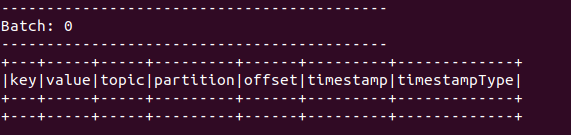

You can use <code>query.stop()</code> to stop the streaming query.